In [39]:
library(pracma)
library(glmnet)


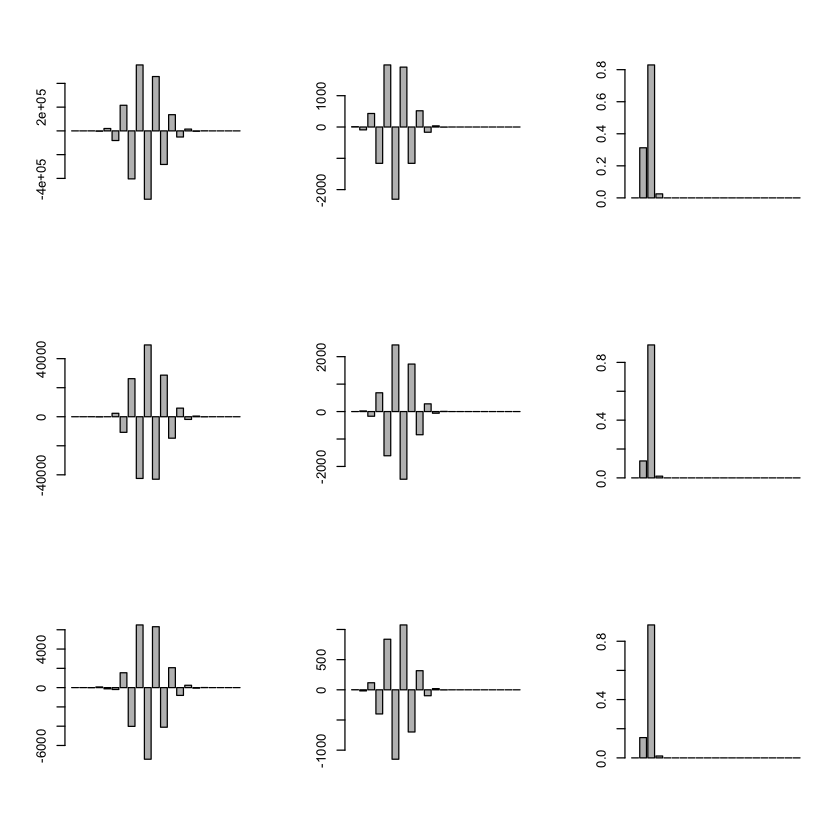

In [49]:
options(warn=-1)
n <- 100
L <- 4
x <- linspace(0,L,n)
f <- x^2 # parabola with 100 data points

M <- 21 # Polynomial degree
phi <- matrix(0, n, M)
for (j in 1:M) {
  phi[,j] <- x^(j-1) # build matrix A
}

trials <- c(2, 10, 100)

par(mfrow=c(3,3))

for (j in 1:length(trials)) {
    trial <- trials[j]
    E1 <- rep(0, trial)
    E2 <- rep(0, trial)
    E3 <- rep(0, trial)
    
    A1 <- matrix(0, M,trial)
    A2 <- matrix(0, M,trial)
    A3 <- matrix(0, M,trial)
    
    for (jj in 1:trial) {
        f <- x^2 + 0.2 * rnorm(n)
        a1 <- pinv(phi, tol=0) %*% f
        f1 <- phi %*% a1
        E1[jj] <- Norm(f-f1,p=2)/Norm(f,p=2)
        
        a2 <- lsfit(phi,f)
        f2 <- phi %*% t(t(a2$coefficients[2:22]))
        E2[jj] = Norm(f-f2,p=2)/Norm(f,p=2)
        
        lambda <- cv.glmnet(phi, f, alpha=1)$lambda.min
        regr3 <- glmnet(phi, f, alpha=1, lambda=lambda)
        a3 <- coef(regr3)
        f3 <- phi %*% t(t(a3[2:22]))
        E3[jj] <- Norm(f-f3,p=2)/Norm(f,p=2)
        
        A1[,jj] <- a1
        A2[,jj] <- t(t(a2$coefficients[2:22]))
        A3[,jj] <- t(t(a3[2:22]))
    }
        
    A1m <- rowMeans(A1)
    A2m <- rowMeans(A2)
    A3m <- rowMeans(A3)
    
    #Err = np.column_stack((E1,E2,E3))
    
    barplot(A1m)
    barplot(A2m)
    barplot(A3m)
}

In [21]:
lambda <- cv.glmnet(phi, f, alpha=1)
lambda$lambda.min

[1] 0.031839